In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ivan/Desktop/fifa-18-demo-player-dataset/df.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df['Value'] = df['Value'].replace({'€':''}, regex = True)

In [8]:
df['Value']= (df['Value'].replace(r'[KM]', '', regex=True).astype(float) *df['Value'].str.extract(r'[\d\.]+([KM])', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(float))
df['Value']=pd.to_numeric(df['Value'])

In [9]:
aggvalue=df.groupby(['Club'])['Value'].agg(['count','mean','sum'])
aggoverall=df.groupby(['Club'])['Overall'].agg(['count','mean','sum'])

Big bias toward very small price, when the price of a player is small


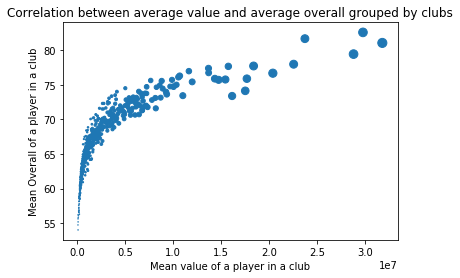

In [11]:
graph=plt.scatter(x=aggvalue['mean'], y=aggoverall['mean'], s=aggvalue['sum']/10000000)
plt.xlabel('Mean value of a player in a club')
plt.ylabel('Mean Overall of a player in a club')
plt.title('Correlation between average value and average overall grouped by clubs')
print('Big bias toward very small price, when the price of a player is small')